<a href="https://colab.research.google.com/github/Danny2611/LAB-ML/blob/master/Lab10_ML_21130584_LeQuocTrung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods** using sklearn api.

*   **Deadline: 23:59, 20/5/2024**



# Import libraries

In [1]:
# code
from sklearn import datasets
from sklearn import svm
from sklearn.svm import SVC
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,  f_classif
import pandas as pd
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from prettytable import PrettyTable
from sklearn.decomposition import PCA


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
iris = datasets.load_iris()
X = iris.data
y = iris.target

svm_model = SVC(kernel='linear', C=1)

scores = cross_val_score(svm_model, X, y, cv=5)

print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {np.mean(scores)}")



Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score: 0.9800000000000001


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest**, **kNN** algorithm with cross validation

In [ ]:
#code
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)

rf_scores = cross_val_score(rf_model, X_new, y, cv=5)
knn_scores = cross_val_score(knn_model, X_new, y, cv=5)


print(f"RandomForest Cross-validation scores: {rf_scores}")
print(f"Mean RandomForest cross-validation score: {np.mean(rf_scores)}")

print(f"kNN Cross-validation scores: {knn_scores}")
print(f"Mean kNN cross-validation score: {np.mean(knn_scores)}")


RandomForest Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean RandomForest cross-validation score: 0.9666666666666668
kNN Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean kNN cross-validation score: 0.9533333333333334


*  1.3 Compare the obtained results of these approaches (SVM, RandomForest, kNN) using PrettyTable

In [ ]:
#code
table = PrettyTable()
table.field_names = ["Algorithm", "Cross-validation Scores", "Mean Score"]
table.add_row(["SVM", scores, np.mean(scores)])
table.add_row(["RandomForest", rf_scores, np.mean(rf_scores)])
table.add_row(["kNN", knn_scores, np.mean(knn_scores)])
print(table)


+--------------+----------------------------------------------------------+--------------------+
|  Algorithm   |                 Cross-validation Scores                  |     Mean Score     |
+--------------+----------------------------------------------------------+--------------------+
|     SVM      | [0.96666667 1.         0.96666667 0.96666667 1.        ] | 0.9800000000000001 |
| RandomForest | [0.96666667 0.96666667 0.93333333 0.96666667 1.        ] | 0.9666666666666668 |
|     kNN      | [0.96666667 0.96666667 0.9        0.93333333 1.        ] | 0.9533333333333334 |
+--------------+----------------------------------------------------------+--------------------+


#Task 2. With fashion dataset:
*   2.1. Apply **K-Means** algorithm using k=10,

4422102/4422102 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


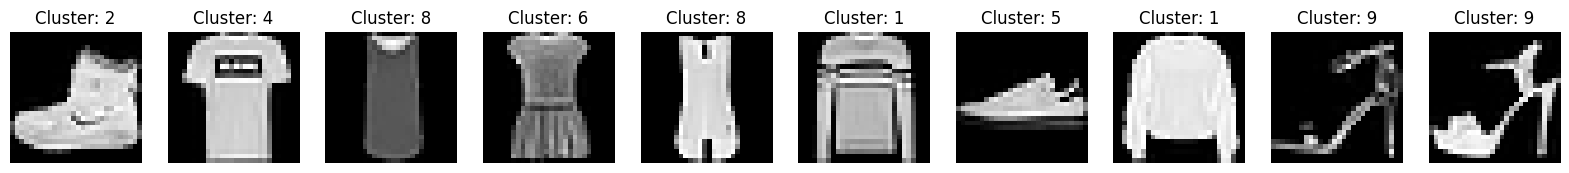

In [ ]:
# code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import fashion_mnist


(X_train, _), (X_test, _) = fashion_mnist.load_data()

X = np.concatenate((X_train, X_test), axis=0)

X = X.reshape(X.shape[0], -1) / 255.0

kmeans = KMeans(n_clusters=10, random_state=42)

kmeans.fit(X)

labels = kmeans.labels_

def plot_clusters(images, labels, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Cluster: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_clusters(X[:10], labels[:10])



*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **SVM** in terms of accuracy, precision, recall, f1 using cross validation.


In [ ]:
# code
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


X_train_small = X_train[:6000]
y_train_small = y_train[:6000]
X_test_small = X_test[:1000]
y_test_small = y_test[:1000]

X = np.concatenate((X_train_small, X_test_small), axis=0)
y = np.concatenate((y_train_small, y_test_small), axis=0)


X = X.reshape(X.shape[0], -1) / 255.0


table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1 Score"]

classifiers = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear', random_state=42)
}


scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}


for name, clf in classifiers.items():
    scores = cross_validate(clf, X, y, cv=5, scoring=scorers)
    table.add_row([
        name,
        np.mean(scores['test_accuracy']),
        np.mean(scores['test_precision']),
        np.mean(scores['test_recall']),
        np.mean(scores['test_f1'])
    ])

print(table)

+--------------+--------------------+--------------------+--------------------+--------------------+
|  Algorithm   |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+--------------+--------------------+--------------------+--------------------+--------------------+
| RandomForest |       0.852        | 0.8512625540061807 |       0.852        | 0.8495118072701127 |
|     kNN      | 0.8160000000000001 | 0.8209702232844736 | 0.8160000000000001 | 0.8149209436318557 |
|     SVM      | 0.8220000000000001 | 0.8225567207111965 | 0.8220000000000001 | 0.8211821876378339 |
+--------------+--------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
from scipy.stats import mode
for name, clf in classifiers.items():
    scores = cross_validate(clf, X, y, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_precision = np.mean(scores['test_precision_weighted'])
    mean_recall = np.mean(scores['test_recall_weighted'])
    mean_f1 = np.mean(scores['test_f1_weighted'])
    table.add_row([name, mean_accuracy, mean_precision, mean_recall, mean_f1])

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(y[mask])[0]

accuracy = accuracy_score(y, labels)
precision = precision_score(y, labels, average='weighted')
recall = recall_score(y, labels, average='weighted')
f1 = f1_score(y, labels, average='weighted')

table.add_row(["K-Means", accuracy, precision, recall, f1])

print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


+--------------+--------------------+--------------------+--------------------+--------------------+
|  Algorithm   |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+--------------+--------------------+--------------------+--------------------+--------------------+
| RandomForest |       0.852        | 0.8512625540061807 |       0.852        | 0.8495118072701127 |
|     kNN      | 0.8160000000000001 | 0.8209702232844736 | 0.8160000000000001 | 0.8149209436318557 |
|     SVM      | 0.8220000000000001 | 0.8225567207111965 | 0.8220000000000001 | 0.8211821876378339 |
| RandomForest |       0.852        | 0.8512625540061807 |       0.852        | 0.8495118072701127 |
|     kNN      | 0.8160000000000001 | 0.8209702232844736 | 0.8160000000000001 | 0.8149209436318557 |
|     SVM      | 0.8220000000000001 | 0.8225567207111965 | 0.8220000000000001 | 0.8211821876378339 |
| RandomForest |       0.852        | 0.8512625540061807 |       0.852        | 0.849511807

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.4. Apply **AgglomerativeClustering** algorithm to fashion dataset using the number of clusters is 10

In [2]:
#code
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from tensorflow.keras.datasets import fashion_mnist
from prettytable import PrettyTable
from scipy.stats import mode


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train_small = X_train[:6000]
y_train_small = y_train[:6000]
X_test_small = X_test[:1000]
y_test_small = y_test[:1000]

X = np.concatenate((X_train_small, X_test_small), axis=0)
y = np.concatenate((y_train_small, y_test_small), axis=0)

X = X.reshape(X.shape[0], -1) / 255.0

table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1 Score"]

classifiers = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear', random_state=42)
}

scorers = {
    'accuracy': 'accuracy',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted'
}

for name, clf in classifiers.items():
    scores = cross_validate(clf, X, y, cv=5, scoring=scorers)
    table.add_row([
        name,
        np.mean(scores['test_accuracy']),
        np.mean(scores['test_precision_weighted']),
        np.mean(scores['test_recall_weighted']),
        np.mean(scores['test_f1_weighted'])
    ])

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(y[mask])[0]

accuracy = accuracy_score(y, labels)
precision = precision_score(y, labels, average='weighted')
recall = recall_score(y, labels, average='weighted')
f1 = f1_score(y, labels, average='weighted')

table.add_row(["K-Means", accuracy, precision, recall, f1])

agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_clustering.fit_predict(X)

agg_labels_mapped = np.zeros_like(agg_labels)
for i in range(10):
    mask = (agg_labels == i)
    agg_labels_mapped[mask] = mode(y[mask])[0]

agg_accuracy = accuracy_score(y, agg_labels_mapped)
agg_precision = precision_score(y, agg_labels_mapped, average='weighted')
agg_recall = recall_score(y, agg_labels_mapped, average='weighted')
agg_f1 = f1_score(y, agg_labels_mapped, average='weighted')

table.add_row(["Agglomerative Clustering", agg_accuracy, agg_precision, agg_recall, agg_f1])

# In kết quả
print(table)


4422102/4422102 [==============================] - 0s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+--------------------------+--------------------+--------------------+--------------------+---------------------+
|        Algorithm         |      Accuracy      |     Precision      |       Recall       |       F1 Score      |
+--------------------------+--------------------+--------------------+--------------------+---------------------+
|       RandomForest       |       0.852        | 0.8512625540061807 |       0.852        |  0.8495118072701127 |
|           kNN            | 0.8160000000000001 | 0.8209702232844736 | 0.8160000000000001 |  0.8149209436318557 |
|           SVM            | 0.8220000000000001 | 0.8225567207111965 | 0.8220000000000001 |  0.8211821876378339 |
|         K-Means          | 0.5161428571428571 | 0.3570487458706771 | 0.5161428571428571 |   0.40788784077825  |
| Agglomerative Clustering | 0.5351428571428571 | 0.4414903086226984 | 0.5351428571428571 | 0.47176474262170753 |
+--------------------------+--------------------+--------------------+------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Task 3.
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





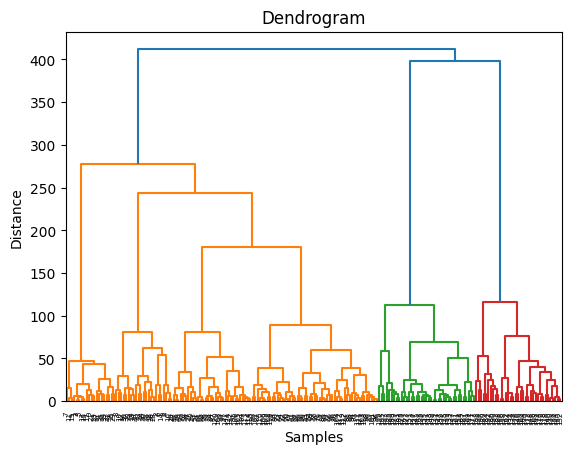

In [3]:
#code
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

data = pd.read_csv('./sample_data/shopping-data.csv')

data = data.drop(['CustomerID', 'Genre'], axis=1)

dendrogram = hierarchy.dendrogram(hierarchy.linkage(data, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

plt.show()



*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

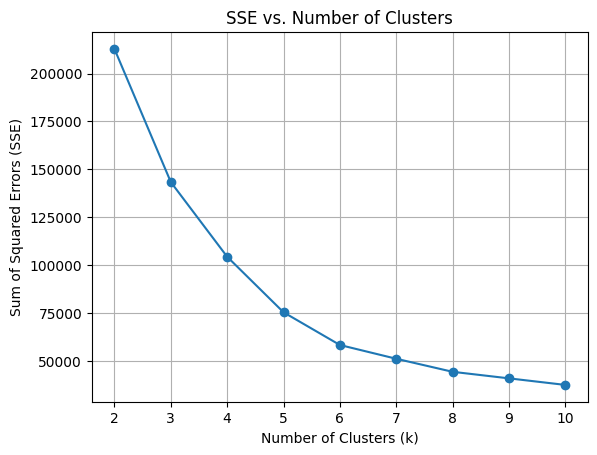

In [4]:
#code
sse = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

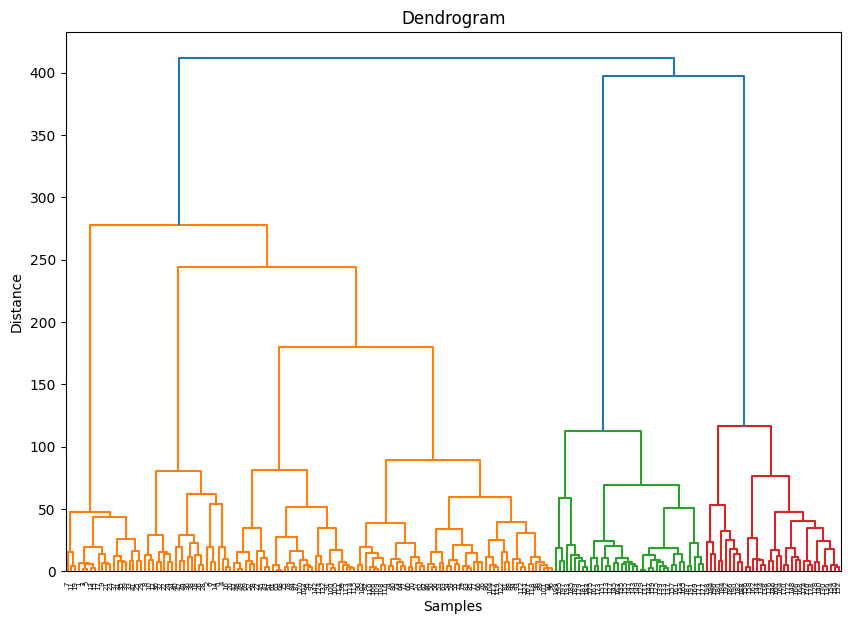

Cluster Labels:
[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 0 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        0
1   21                  15                      81        3
2   20                  16                       6        0
3   23                  16                      77        3
4   31                  17                      40        0


KeyError: 'Annual Income'

<Figure size 1000x700 with 0 Axes>

In [5]:
#code
plt.figure(figsize=(10, 7))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

num_clusters = 4

agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
labels = agglomerative.fit_predict(data)

print("Cluster Labels:")
print(labels)

data['Cluster'] = labels

print(data.head())

plt.figure(figsize=(10, 7))
plt.scatter(data['Annual Income'], data['Spending Score'], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.